In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-08    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-11    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  245.899994  91.573029  121.980003  229.573318  144.020004   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-08    1.588121   2.977763   13.730146    2.764918    1.144183   
1985-03-11    1.606167   3.060992   13.769285    2.764918    1.159043   
...                ...        ...         ...         ...         ...   
2020-12-22  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   Volume                                          bop             \
Symbol          BDX      GL      IBM      NSC      PEP       BDX         GL   
1985-03-05   576000  378000  4040000  1125900  5153400 -0.624992  42.000023   
1985-03-06   923200  450225  4120000  1773900  3722400 -0.857135  55.666877   
1985-03-07  1408000   71550  7028000   770400  4624200 -0.249985  54.666638   
1985-03-08   987200   69525  6892000  3031200  2764800 -0.666667  81.250315   
1985-03-11   692800  648675  4204000   936900  1609200 -0.750000  32.200041   
...             ...     ...      ...      ...      ...       ...        ...   
2020-12-22   941100  447600  4336100   806200  2653700 -0.464618  -0.358210   
2020-12-23   919500  554300  2693900  1209200  2645100 -0.927869   0.519739   
2020-12-24   440000   76100  1761100   383100   883300  0.710346  -0.255953   
2020-12-28   644500  345500  3615200   785100  2493500 -0.251941  -0.086706   
2020-12-29   817000  514800  3487000   929900  3186700 -0.305475  -0.923078   

Attributes                                    ema200                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.300000 -0.142862  0.700006    1.720674   3.251535   14.185128   
1985-03-06 -0.818182  0.363643 -0.749982    1.719894   3.249915   14.182029   
1985-03-07 -0.666667  1.000000  0.142847    1.719077   3.247759   14.176104   
1985-03-08 -0.466667 -0.875001 -0.400007    1.718088   3.245349   14.169718   
1985-03-11  0.812500 -0.250000 -0.333371    1.716795   3.242686   14.165344   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.165748  0.247494 -0.381579  242.654200  85.275914  119.399113   
2020-12-23  0.013608  0.324324 -0.052289  242.670079  85.349993  119.427641   
2020-12-24 -0.348312  0.353474  0.237109  242.723013  85.423037  119.463642   
2020-12-28 -0.130841  0.149392  0.548543  242.777013  85.499524  119.500561   
2020-12-29 -0.691961 -0.496620 -0.134712  242.832466  85.564029  119.527098   

Attributes                              macd

## 1) Modelo donde escalamos solo las variables independientes

In [3]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [4]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [5]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

## Trabajo con la accion NSC usando standarizacion

In [6]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.839015,232.182770,-0.603063,0.420046,3.636466,-0.397124,0.279083,0.790954,2.008182
2020-12-23,3.892342,233.447678,-0.309457,0.561569,3.642539,-0.359127,2.165260,0.556225,1.892915
2020-12-24,3.918191,235.758347,-0.911313,0.615266,3.648830,-0.249800,1.038579,0.391753,1.778689
2020-12-28,3.965412,233.049286,-0.618435,0.239337,3.655565,-0.022162,1.914891,0.308711,1.587939


In [7]:
# Realizamos el holdout
#HOLDOUT = 5
#for i in range(HOLDOUT):
model = SVR()
parameter_space = {
    "kernel": ['linear'],
   "C": [50, 80],
   "gamma": [0.0001,0.01],
    "epsilon": [0.001,0.1]
}
i=0.3
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'C': 50, 'epsilon': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
1.2018341038609375


## CrossValidation

In [7]:
Params = {
    "kernel": 'linear',
   "C": 50,
   "gamma":0.0001,
    "epsilon": 0.001,
    'max_iter':1
}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])

In [9]:

codeM.crossValidation(svr, Params, dataNSC_scaler)

[0.01323281 0.01353963 0.01302188 0.01305754 0.01356127 0.01346966
 0.01345441 0.01333414 0.01367518 0.01398886]
mean: 0.013433538335057666	 std:0.0002751522195996185


## Prediccion de todas las acciones, escalandolas

'NSC'

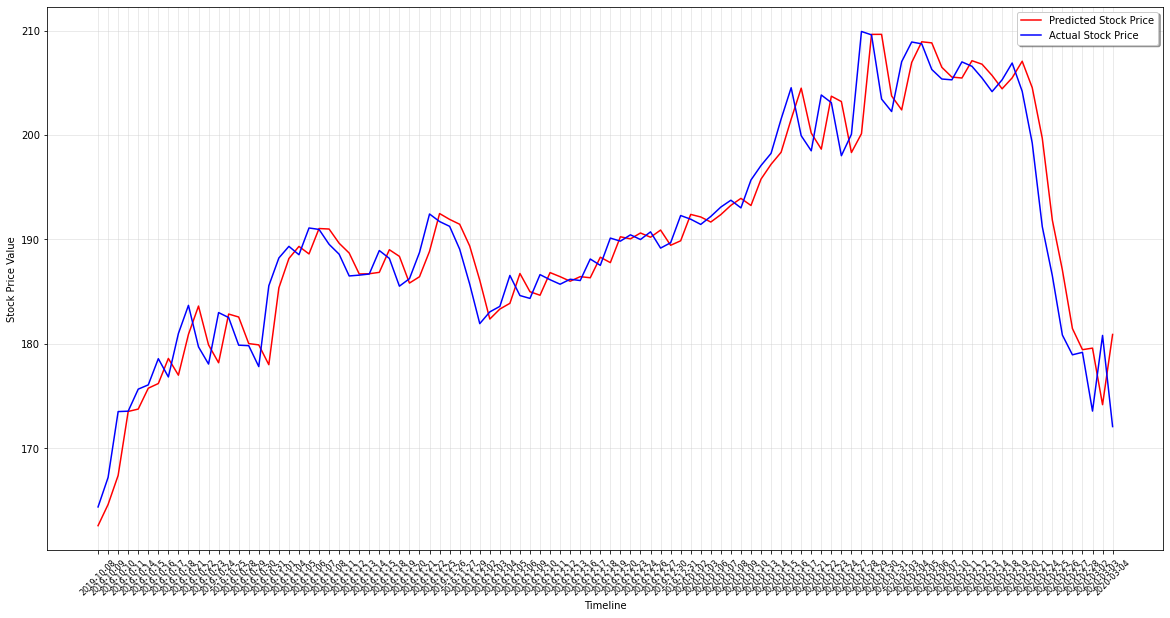

mae: 0.554663332084501
rmse: 1.28853203255708
mape: 0.013498364036902282


'GL'

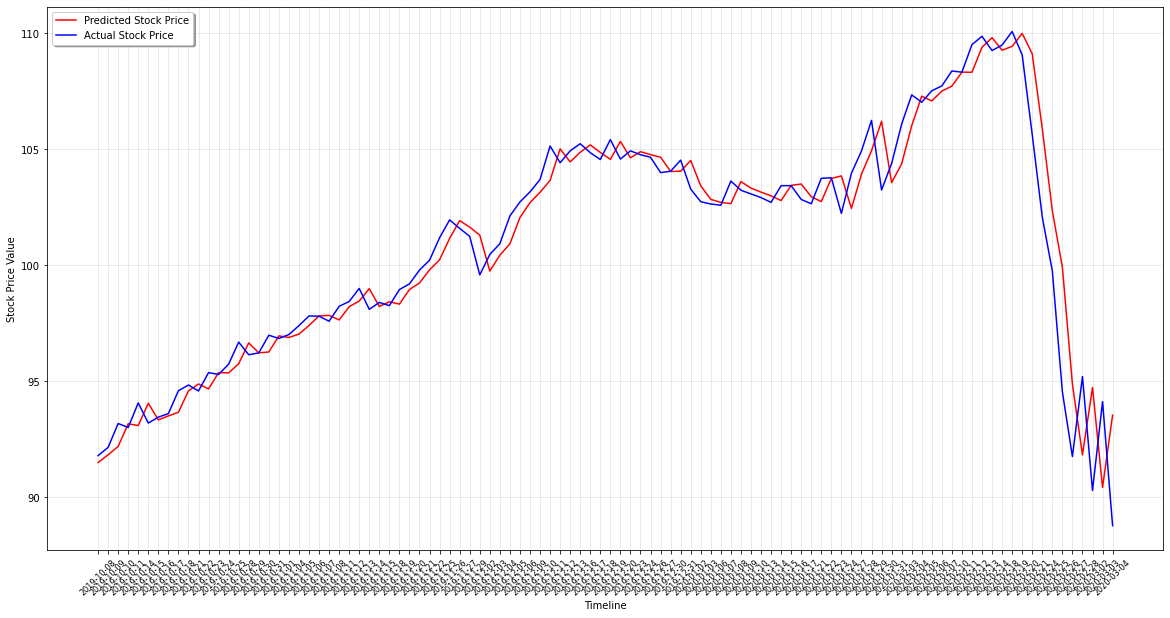

mae: 0.26764779041506054
rmse: 0.62522778916348
mape: 0.012433170165902523


'PEP'

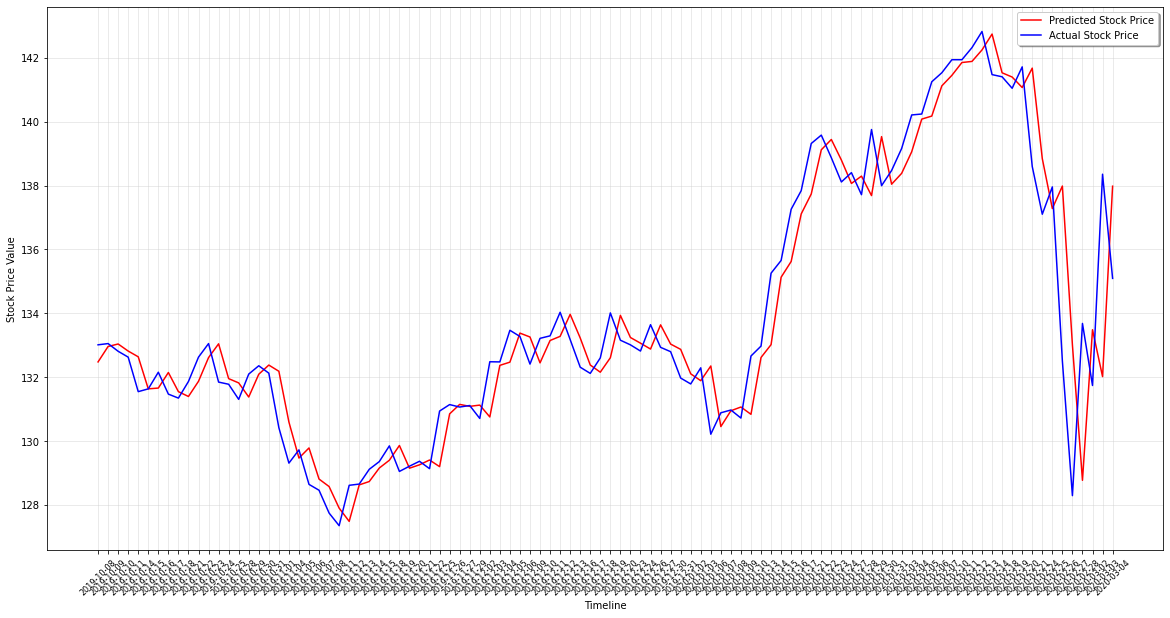

mae: 0.35858589881515285
rmse: 0.7449082949147071
mape: 0.010830956463462996


'BDX'

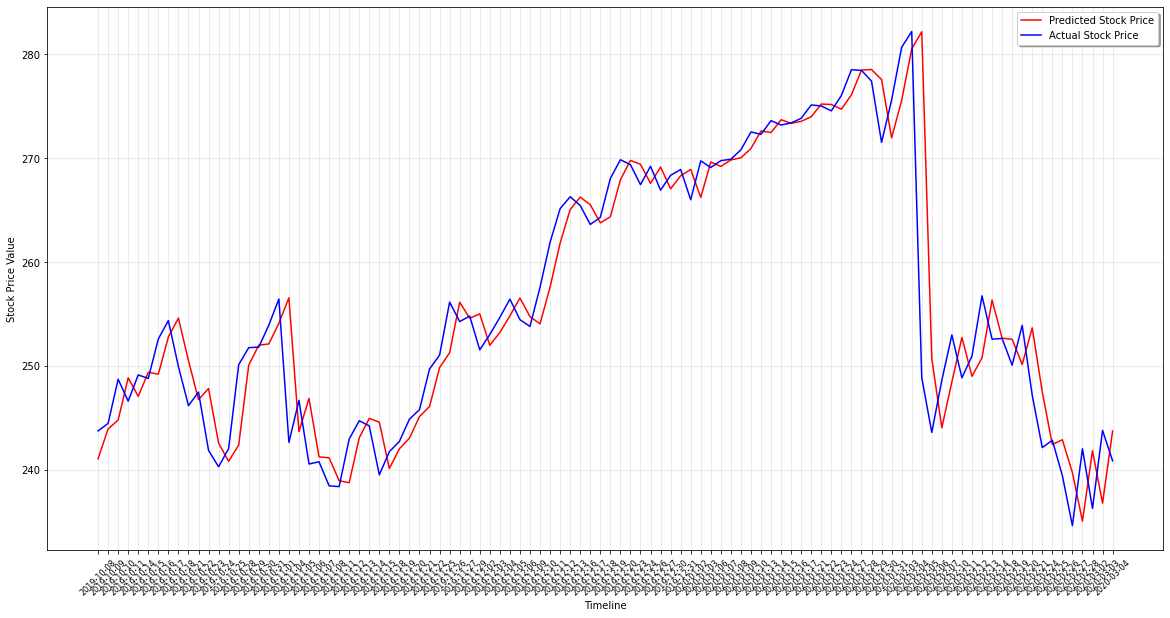

mae: 0.6171844084349211
rmse: 1.4064901815565936
mape: 0.011413216729148908


'IBM'

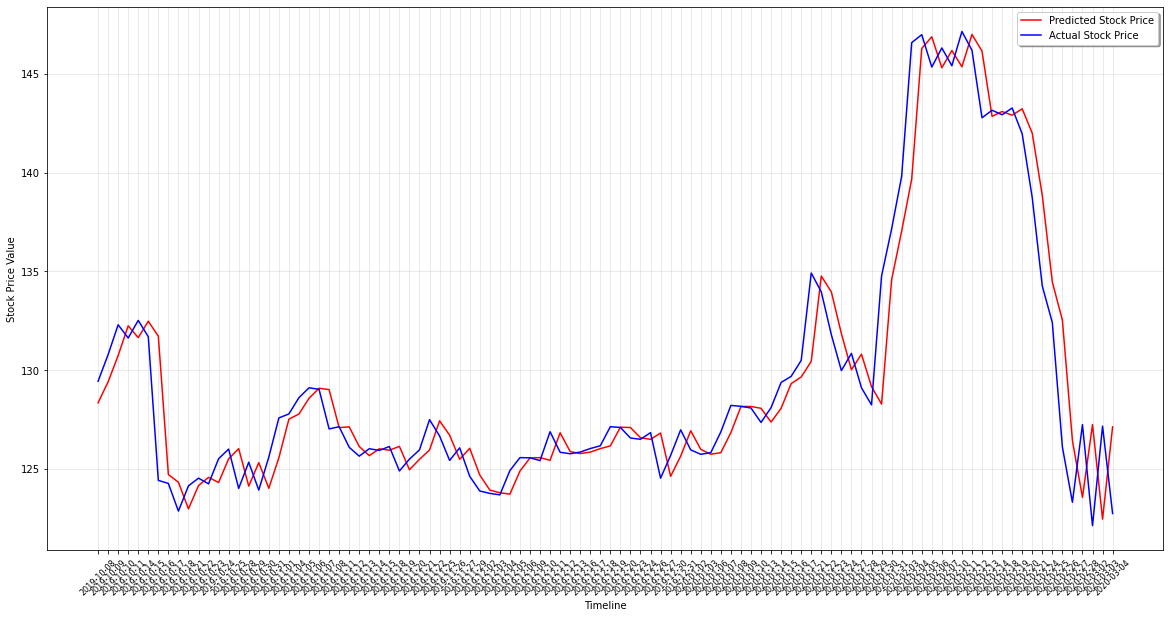

mae: 0.741943833455069
rmse: 1.3014150446737198
mape: 0.012239648570999323


In [8]:
codeM.allStock(data_scaler, svr, 8)


## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [ ]:
# Realizamos el holdout
#HOLDOUT = 5
sc_predict = StandardScaler()
stock=dataNSC_scaler
y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
#for i in range(HOLDOUT):
Parameter_space = {
    "kernel": ['linear'],
   "C": [50, 80],
   "gamma": [0.0001,0.01],
    "epsilon": [0.001,0.1]
}
model = SVR()
i=0.3
codeM.gridSearch(model,stock, Parameter_space,0.3,8,i, isScaled=True, sc_predict=sc_predict, y=y_data)

## all stocks

In [ ]:
codeM.allStock(data, svr, 8, isScaled=True)

'NSC'

## window

In [8]:
data_scaler_window = pd.read_csv('datawindow.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_window

Attributes           0                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-14    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-15    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-18    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-19    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-20    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  242.690002  93.519264  122.631294  234.304214  144.970001   
2020-12-23  240.000000  91.592987  121.901054  228.328339  144.229996   
2020-12-24  244.130005  93.529251  124.269409  228.876129  144.770004   
2020-12-28  245.289993  93.349594  123.894424  227.780548  144.889999   
2020-12-29  248.699997  93.249794  123.894424  229.762558  145.710007   

Attributes          1                                                    2  \
Symbol            BDX        GL        IBM        NSC        PEP       BDX   
1985-03-14   576000.0  378000.0  4040000.0  1125900.0  5153400.0 -0.624992   
1985-03-15   923200.0  450225.0  4120000.0  1773900.0  3722400.0 -0.857135   
1985-03-18  1408000.0   71550.0  7028000.0   770400.0  4624200.0 -0.249985   
1985-03-19   987200.0   69525.0  6892000.0  3031200.0  2764800.0 -0.666667   
1985-03-20   692800.0  648675.0  4204000.0   936900.0  1609200.0 -0.750000   
...               ...       ...        ...        ...        ...       ...   
2020-12-22  1274000.0  332200.0  4481400.0  1161200.0  2975500.0  0.498271   
2020-12-23  1236600.0  426600.0  5050000.0  2004900.0  3952400.0 -0.504374   
2020-12-24  1261700.0  411600.0  4359600.0  1210400.0  3183800.0  0.641740   
2020-12-28  1210700.0  315600.0  4530100.0  1081800.0  4915800.0  0.070539   
2020-12-29  1172500.0  337900.0  3788000.0  1097100.0  3312500.0  0.621545   

Attributes                                                    3             \
Symbol             GL       IBM       NSC       PEP         BDX         GL   
1985-03-14  42.000023 -0.300000 -0.142862  0.700006    1.720674   3.251535   
1985-03-15  55.666877 -0.818182  0.363643 -0.749982    1.719894   3.249915   
1985-03-18  54.666638 -0.666667  1.000000  0.142847    1.719077   3.247759   
1985-03-19  81.250315 -0.466667 -0.875001 -0.400007    1.718088   3.245349   
1985-03-20  32.200041  0.812500 -0.250000 -0.333371    1.716795   3.242686   
...               ...       ...       ...       ...         ...        ...   
2020-12-22  -0.041916  0.099997  0.122034  0.792896  242.387914  84.747340   
2020-12-23  -1.000000 -0.646210 -0.949631 -0.421490  242.364154  84.815455   
2020-12-24   0.488766  0.618475 -0.299998  0.152178  242.381724  84.902160   
2020-12-28  -0.379745 -0.296873 -0.369729  0.579617  242.410662  84.986214   
2020-12-29  -0.129997 -0.449154  0.188745  0.450985  242.473243  85.068439   

Attributes                                             4                      \
Symbol             IBM         NSC         PEP       BDX        GL       IBM   
1985-03-14   14.185128    2.769713    1.143313 -0.007366 -0.025473 -0.012914   
1985-03-15   14.182029    2.769613    1.143351 -0.011991 -0.032744 -0.034875   
1985-03-18   14.176104    2.770142    1.143359 -0.015837 -0.042494 -0.074589   
1985-03-19   14.169718    2.770195    1.143338 -0.020109 -0.051861 -0.109018   
1985-03-20   14.165344    2.770143    1.143346 -0.025747 -0.060823 -0.119132   
...                ...         ...         ...       ...       ...       ...   
2020-12-22  119.129244  202.686896  135.104759  1.462677  1.799938  2.289730   
2020-12-23  119.156825  202.942035  135.195557  1.466273  1.456414  2.078649   
2020-12-24  119.207696  203.200086  135.290825  1.781840  1.325134  2.078513   
2020-12-28  119.254330  203.444668  135.386339  2.101308  1.192846  2.024806   
2020-12-29  119.300500  203.706537  135.489062  2.599680  1.

In [9]:
dataNSC_scaler = data_scaler_window.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,CloseNext
1985-03-14,2.738583,1125900.0,-0.142862,2.769713,-0.003494,-0.015801,-0.000900,0.045925,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,...,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.717519
1985-03-15,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,...,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.696452
1985-03-18,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,...,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.706985
1985-03-19,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,...,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.685919
1985-03-20,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,...,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.706985,1068300.0,0.000000,2.767720,-0.013418,0.010532,-0.005794,0.045925,2.664852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,234.304214,1161200.0,0.122034,202.686896,2.994379,-1.244980,4.445476,2.921728,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,...,229.762558,1097100.0,0.188745,203.706537,0.323638,1.982010,2.379929,4.650179,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,232.182770
2020-12-23,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,...,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,229.573318,806200.0,0.247494,204.485850,-0.342254,0.358551,1.149920,4.805877,233.447678
2020-12-24,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,1097100.0,0.18874

In [ ]:
model = SVR()
parameter_space = {
    "kernel": ['linear'],
   "C": [30, 50, 80],
   "gamma": [0.0001,0.01],
    "epsilon": [0.001,0.1]
}
i=1
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

In [10]:
Params = {
    "kernel": 'linear',
   "C": 50,
   "gamma":0.0001,
    "epsilon": 0.001
}
model = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])

In [ ]:
codeM.crossValidation(svr, Params, dataNSC_scaler)

In [ ]:
codeM.allStock(data_scaler_window, model, 8)

'NSC'

## PCA

In [11]:
data_scaler_PCA= pd.read_csv('dataPCA.csv', header=[0,1], index_col=0)
data_scaler_PCA.set_index(pd.DatetimeIndex(list(data_scaler_PCA.index)).strftime('%Y-%m-%d'), inplace=True)

In [12]:
Params = {
    "kernel": 'linear',
   "C": 50,
   "gamma":0.0001,
    "epsilon": 0.001
}
model = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])

In [ ]:
codeM.crossValidation(model, Params4, dataNSC_scaler)

'NSC'

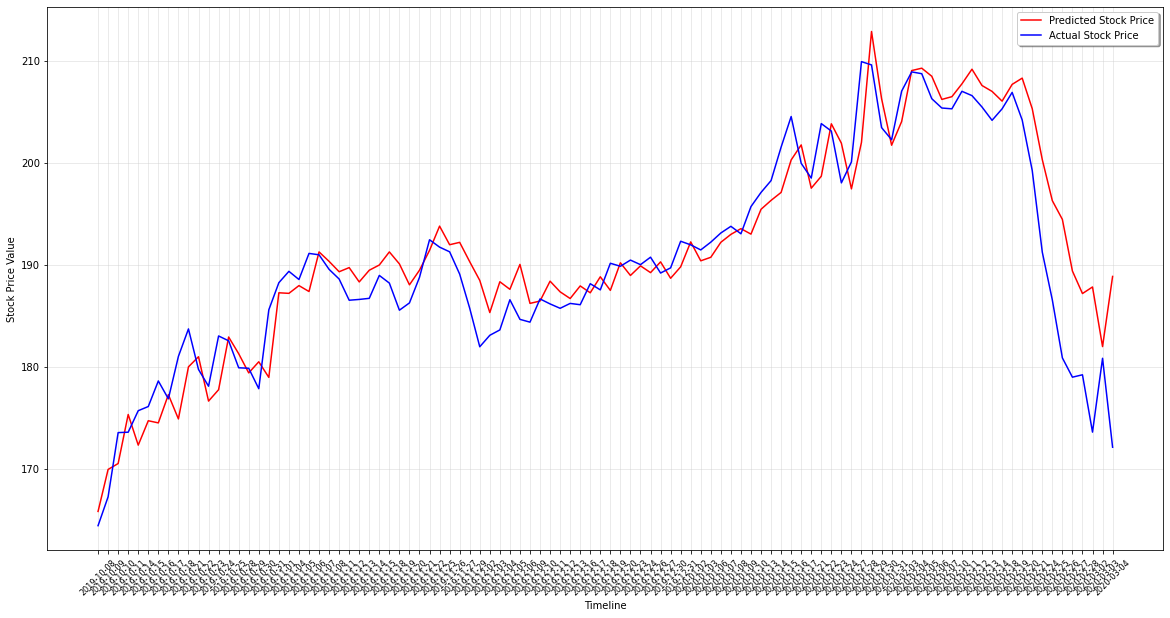

mae: 0.761190761402237
rmse: 1.7437299964423092
mape: 0.01866463987254863


'GL'

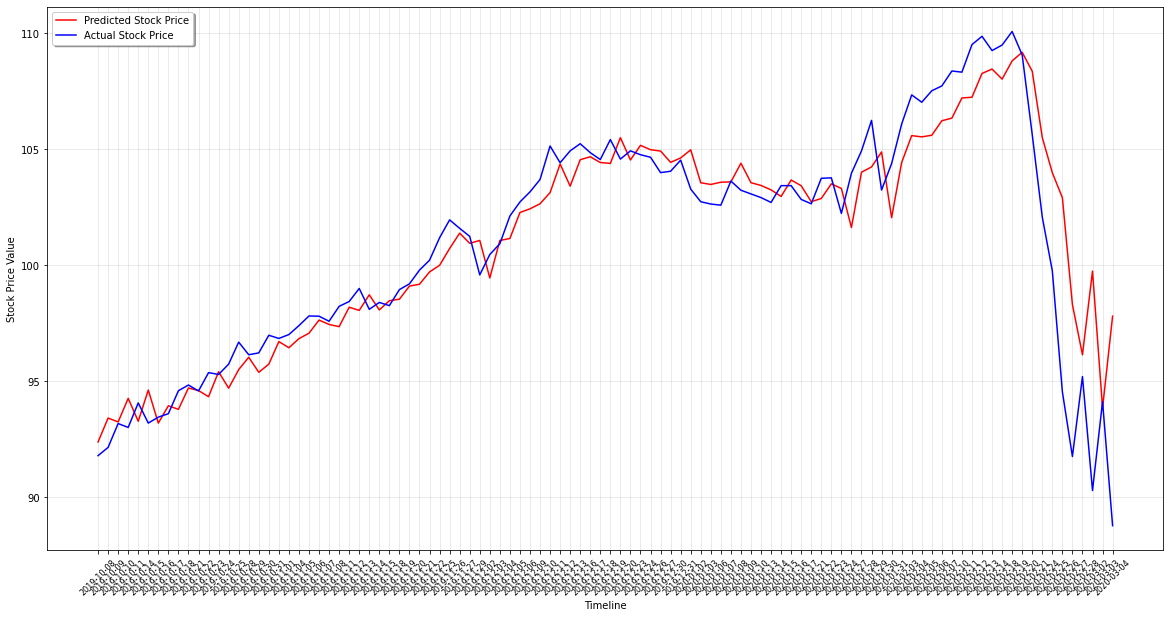

mae: 0.35083631254533365
rmse: 0.8344815424376177
mape: 0.01897326928988026


'PEP'

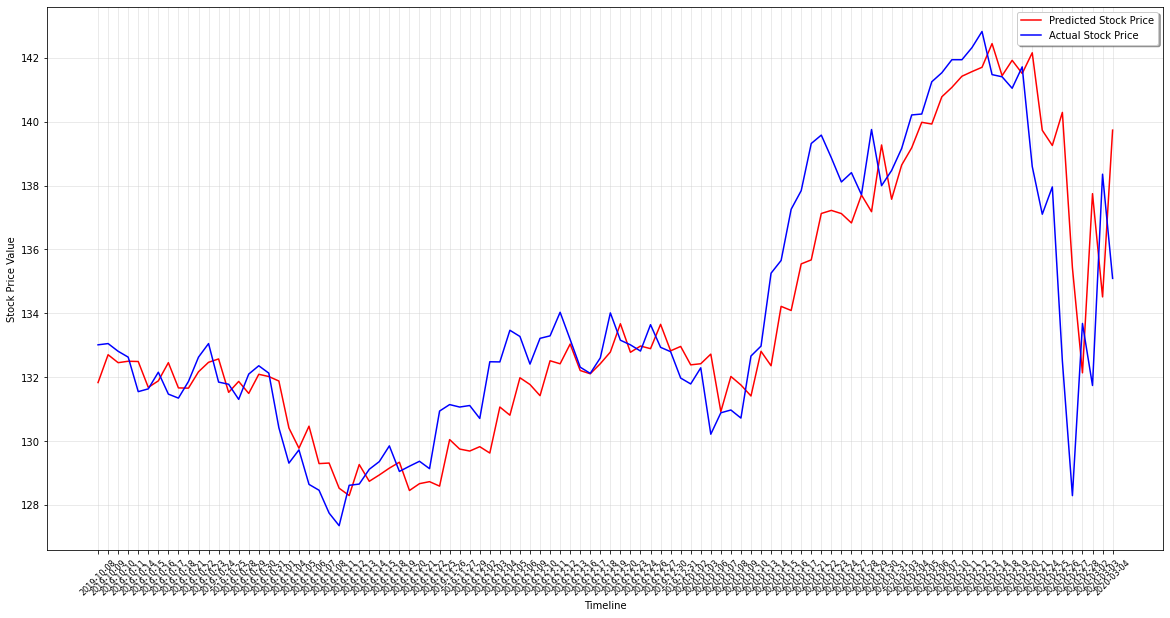

mae: 0.45637576163216176
rmse: 0.8782359563098813
mape: 0.013822261010433505


'BDX'

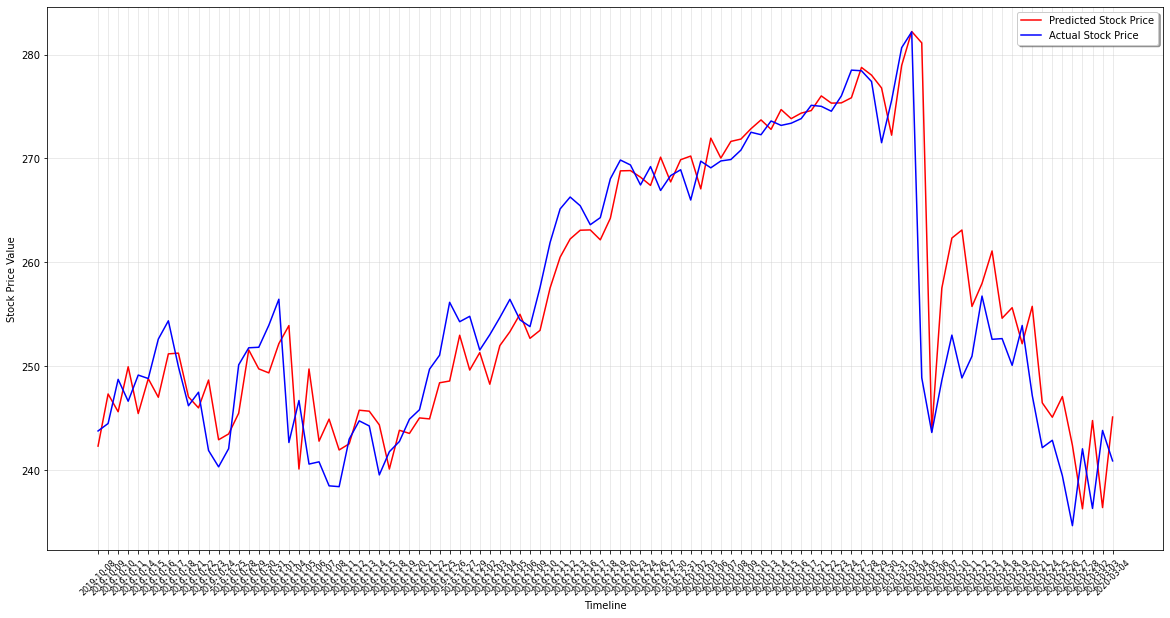

mae: 0.8351868187932471
rmse: 1.8779612351042372
mape: 0.01542627248177791


'IBM'

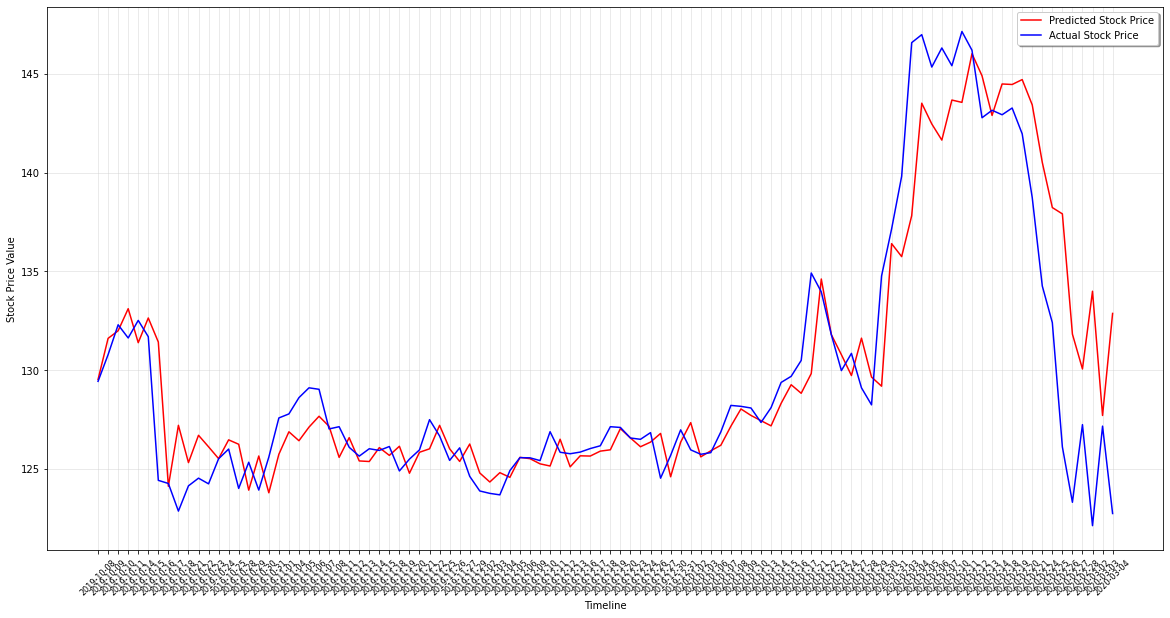

mae: 1.0013331217962733
rmse: 1.663102919515604
mape: 0.01664491736463478


In [13]:
codeM.allStock(data_scaler_PCA, model, 6)

## pca all scaled

'NSC'

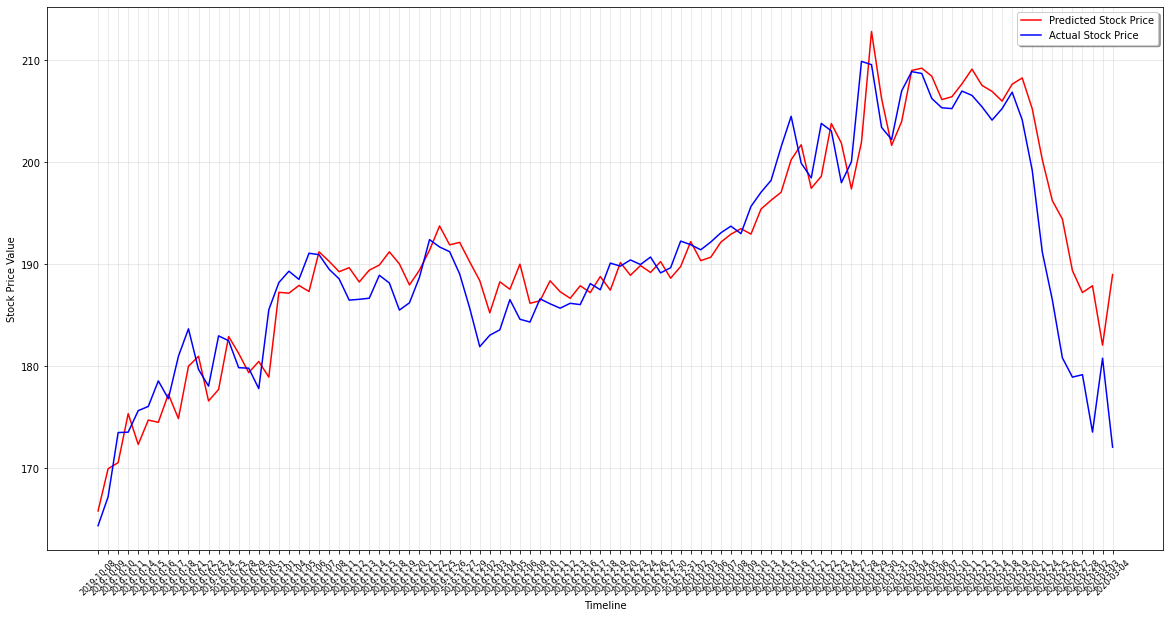

mae: 0.7618204279075156
rmse: 1.7461144871559864
mape: 0.018749749125901036


'GL'

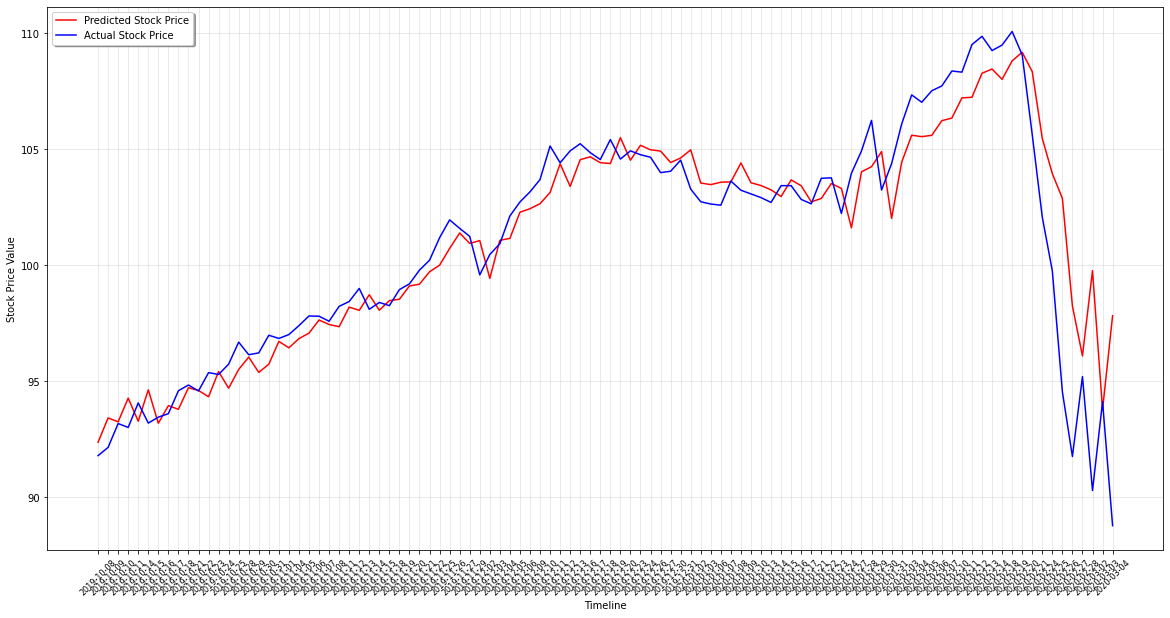

mae: 0.3511267758046476
rmse: 0.833365759959836
mape: 0.01905112482916474


'PEP'

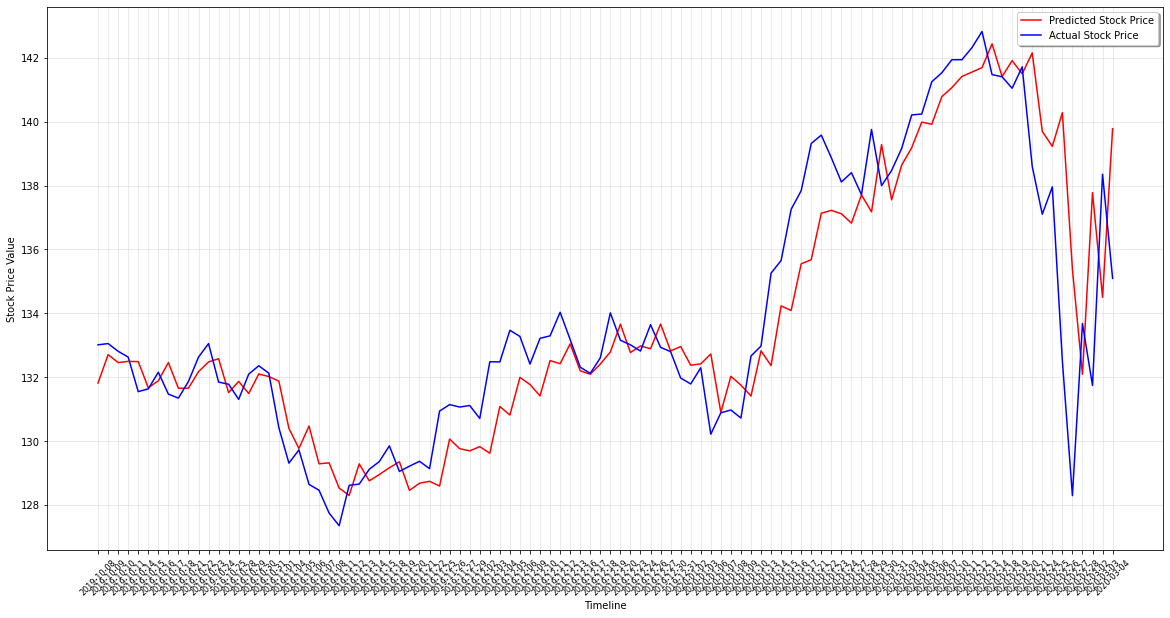

mae: 0.4568148961726828
rmse: 0.8787061006034099
mape: 0.014028153201898357


'BDX'

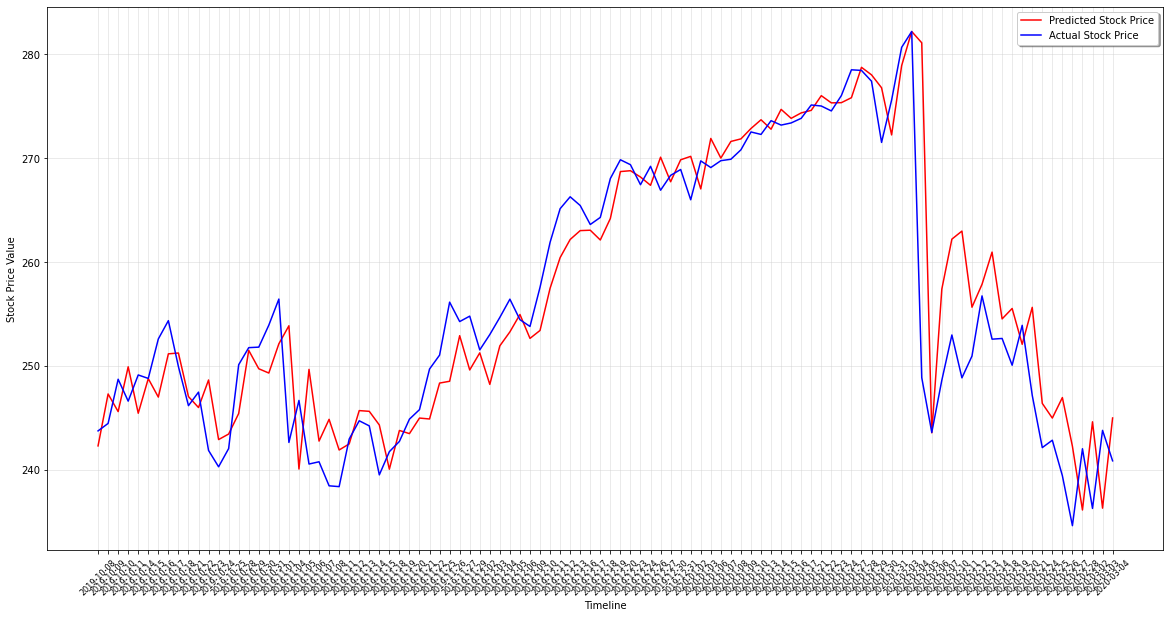

mae: 0.8361799445325182
rmse: 1.8755107869627352
mape: 0.015753747000750738


'IBM'

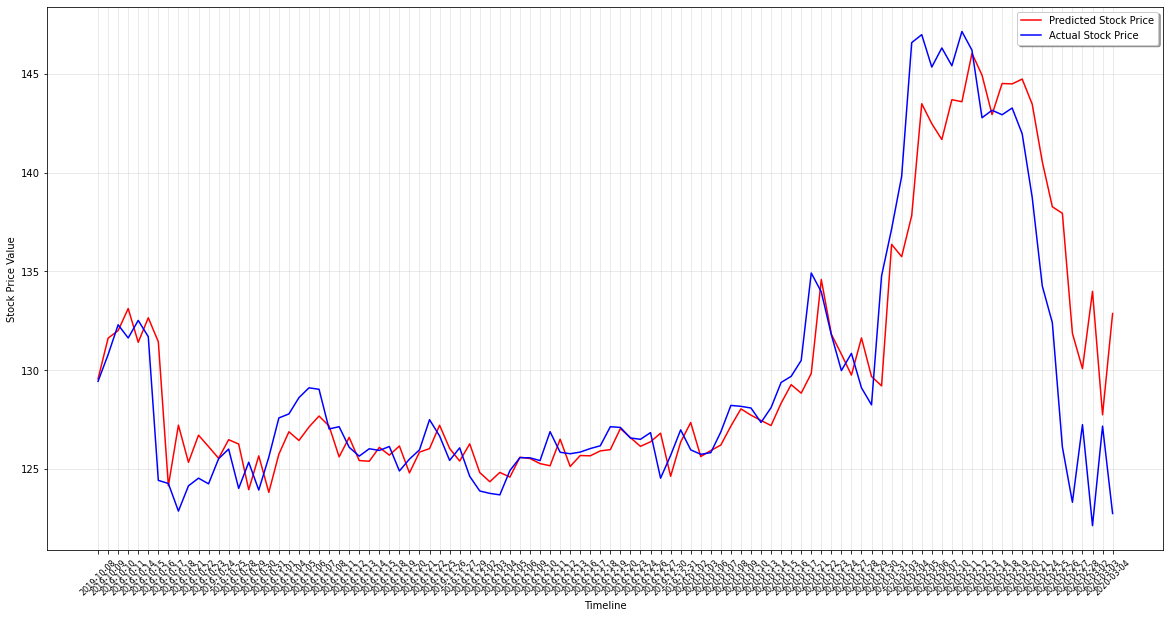

mae: 1.0011997436622608
rmse: 1.6634181624478357
mape: 0.0166274600771845


In [14]:
codeM.allStock(data_scaler_PCA, model, 6, isScaled=True)

In [20]:
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data.sort_index(ascending=True, inplace=True)
    df = data.xs(stock, level=1, axis=1)
    X_scaled = np.array(df.drop(['CloseNext'], axis=1))
    y_scaled = np.array(df['CloseNext'])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=2021)
    y_test_pred = list()
    for x in y_test:
            if list(y_scaled).index(x) == len(y_scaled)-1:
                y_test_pred.append(x)
            else:
                y_test_pred.append(y_scaled[list(y_scaled).index(x)+1])
   
    y_test = np.array(y_test)
    y_test_pred = np.array(y_test_pred)
    print(stock)
    mape = mean_absolute_percentage_error(y_test,y_test_pred)
    rmse = mean_squared_error(y_test,y_test_pred, squared=False)
    mae=median_absolute_error(y_test,y_test_pred)
    print("mape:",mape)
    print("rmse:",rmse)
    print("mae:",mae)


NSC
mape: 0.013008946065076831
rmse: 1.114846139195718
mae: 0.19431495666504084
GL
mape: 0.011650632194093171
rmse: 0.5522422944535617
mae: 0.10495948791503906
PEP
mape: 0.010198384752762656
rmse: 0.7276153082932315
mae: 0.16675186157226562
BDX
mape: 0.010794501990894835
rmse: 1.4650713806619542
mae: 0.20530319213867898
IBM
mape: 0.011573188124445775
rmse: 1.193186703154797
mae: 0.34926605224609375
